In [3]:
import numpy as np
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt
import IPython, io

sample_rate, audio = wavfile.read('final.wav')
_, noise = wavfile.read('finalnoise.wav')

# Stereo to Mono (bcoz of two channels : left and right)
if len(audio.shape) == 2:
    audio = audio.sum(axis=1) / 2
if len(noise.shape) == 2:
    noise = noise.sum(axis=1) / 2
    
IPython.display.Audio(data=audio, rate=sample_rate)

3.628167750625228
51.63382680329235


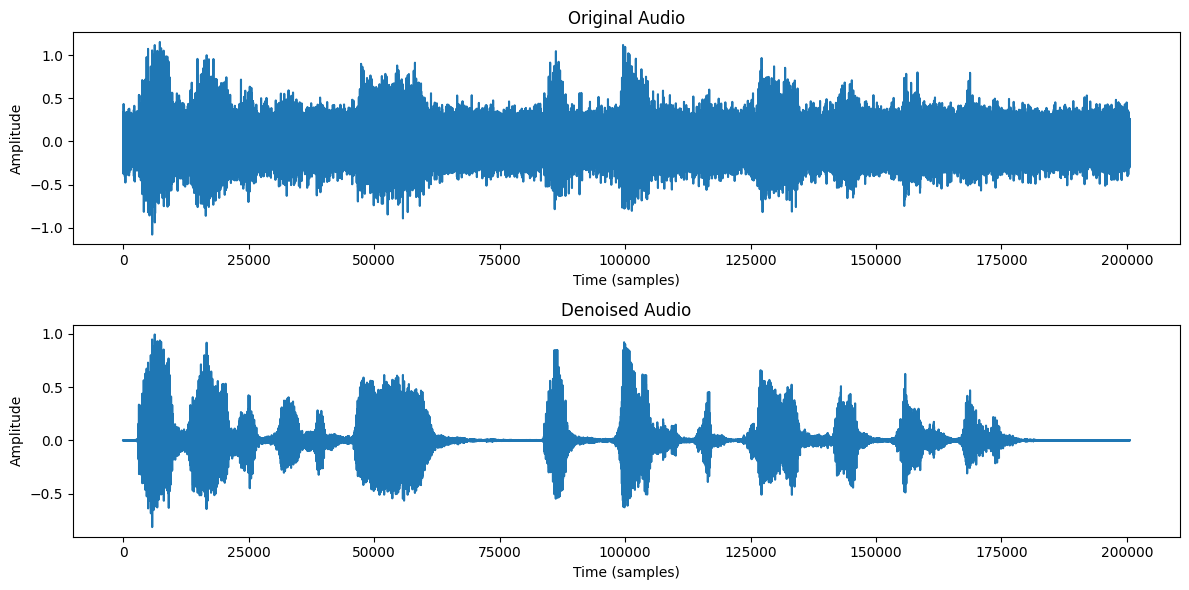

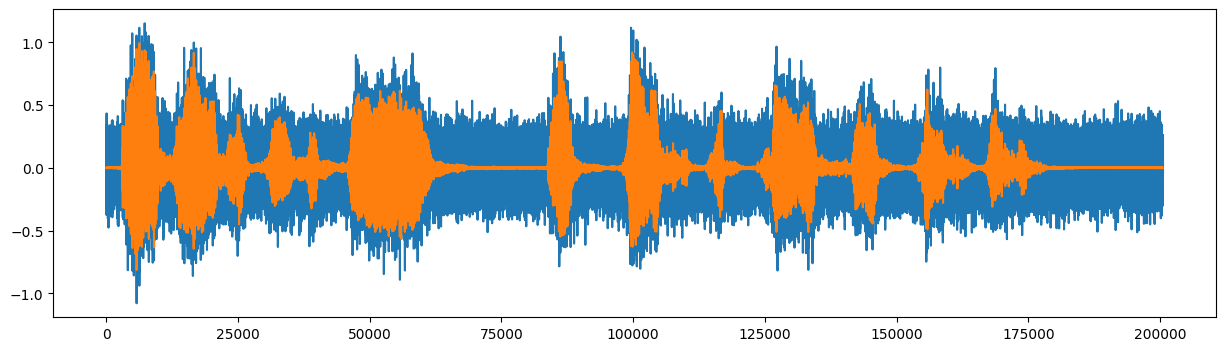

In [4]:
#FFT(to convert time domain to freq domain by dividing it into even and odd indices and recursively combining their results)
def fft(x):
    N = len(x)
    if N <= 1:
        return x
    even = fft(x[0::2])
    odd = fft(x[1::2])
    T = [np.exp(-2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
    return [even[k] + T[k] for k in range(N // 2)] + [even[k] - T[k] for k in range(N // 2)]

def ifft(X):
    N = len(X)
    if N <= 1:
        return X
    even = ifft(X[0::2])
    odd = ifft(X[1::2])
    T = [np.exp(2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
    return [even[k] + T[k] for k in range(N // 2)] + [even[k] - T[k] for k in range(N // 2)]

# For more precicion, we convert it into float
audio = audio.astype(np.float32)
noise = noise.astype(np.float32)

# Convert t to f
audio_spectrum = np.fft.fft(audio)
noise_spectrum = np.fft.fft(noise)

# To subtract/filter complex,img numbers 
audio_magnitude = np.abs(audio_spectrum)
noise_magnitude = np.abs(noise_spectrum)

audio_mean = np.mean(audio_magnitude)
noise_mean = np.mean(noise_magnitude)
noise_std = np.std(noise_magnitude)
print(noise_mean)
print(audio_mean)

if audio_mean>600000:
    threshold=audio_mean/240000
    
elif audio_mean<100:
    threshold=audio_mean*100
    
elif 100000<audio_mean<600000:
    threshold=audio_mean/300000
# threshold = 2.5

# If audio_mag is less threshold times nois_mag then that f components are noise part
mask = audio_magnitude < threshold * noise_magnitude #returns T if noise else F
denoised_spectrum = audio_spectrum * (1 - mask) # if T then it is 0
filtered_audio = np.fft.ifft(denoised_spectrum).real




# Second method to remove noise from audio using weiner filtering

# def wiener_filter(signal, noise, alpha=1.0):
#     signal_spectrum = np.fft.fft(signal)
#     noise_spectrum = np.fft.fft(noise)

#     # Calculate the power spectral density of the signal and noise
#     psd_signal = np.abs(signal_spectrum) ** 2
#     psd_noise = np.abs(noise_spectrum) ** 2

#     # Apply Wiener filter to estimate the clean signal
#     clean_signal_spectrum = (1 / (1 + alpha * (psd_noise / psd_signal))) * signal_spectrum

#     # Inverse FFT to obtain the clean audio
#     clean_signal = np.fft.ifft(clean_signal_spectrum).real

#     return clean_signal
# alpha = 15 # You may need to adjust this value

# # Apply the Wiener filter to denoise the audio
# filtered_audio = wiener_filter(audio, noise, alpha)












# wavfile.write('denoised_audio.wav', sample_rate, denoised_audio.astype(np.int16))

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.title("Original Audio")
plt.plot(audio)
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.subplot(2, 1, 2)
plt.title("Denoised Audio")
plt.plot(filtered_audio)
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.tight_layout()

plt.show()

fig, ax = plt.subplots(figsize=(15,4))
ax.plot(audio)
ax.plot(filtered_audio)

IPython.display.Audio(data=filtered_audio, rate=sample_rate)